# Galvo Target Analysis
This notebook performs analysis of galvo targeting data using the GalvoTargetAnalysis class.
First cell configures the imports the necessary packages.


In [2]:
# IMPORTS: MUST BE RUN FIRST
# Core scientific packages
import numpy as np
import matplotlib.pyplot as plt

# File and path handling
import os
import glob
from pathlib import Path

import numpy as np
import os
import glob
from pathlib import Path
from tkinter import filedialog
import tkinter as tk
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import suite2p as s2p
import h5py
import pyabf
from skimage import measure
import xml.etree.ElementTree as ET
from scipy import signal as sig

# GUI
import tkinter as tk
from tkinter import filedialog

# Signal processing
from scipy.signal import find_peaks
from scipy import signal as sig

# Neural imaging
import suite2p as s2p

# Data handling
import h5py

# XML parsing
import xml.etree.ElementTree as ET

# Import our analysis class
from process_spirals import GalvoTargetAnalysis

import ipympl
# Configure matplotlib for inline plotting in notebook
%matplotlib widget



No module named 'cellpose'
cannot use anatomical mode, but otherwise suite2p will run normally


#### Initialize Analyzer and Get Directories

In [32]:
# Call to reload the process_spirals module (if it has been modified)
import importlib
import process_spirals
importlib.reload(process_spirals)
from process_spirals import GalvoTargetAnalysis

In [33]:
# Step 1: input file paths for raw data, suite2p, sync files and output

# Create new analyzer instance
analyzer = GalvoTargetAnalysis()
analyzer.get_directories(
    raw_data_path=r"W:\Jordyn\Rawdata\IG-6-1L\2024-10-01\TSeries",
    suite2p_path=r"W:\Jordyn\Processed Data\IG-6-1L\2024-10-01\suite2p\plane0",
    sync_path=r"W:\Jordyn\Clampx\IG-6-1L\2024-10-01",
    save_path=r"W:\Jordyn\Processed Data\IG-6-1L\2024-10-01\python_proc"
)

# other way to set directories
#analyzer.get_directories()


#### Set Parameters and Load Data

In [34]:
# Set number of channels
analyzer.nchannels = 2  # Adjust if different

# Load Suite2p data 
analyzer.load_suite2p_data()
print("Suite2p data loaded successfully")

Suite2p data loaded successfully


#### Get Frame Timing Information
- This cell will show plots for verification. Press Enter in the output to continue through the plots.

In [35]:
#### Get Frame Timing Information 
#alignment_info = analyzer.get_frame_times(channel_number=5, plot_on=True)
alignment_info =  analyzer.get_frame_times(channel_number=4)


# for idx, acq in enumerate(alignment_info):
#     analyzer.plot_frame_times(num=idx, galvo_signal=acq['galvo_signal_norm'],  frame_times=acq['frame_times'],plot_on=False)


Imaging Dir: TSeries-09262024-920nm-1.75x-275poc-883, Sync File: 2024_10_01_0000.abf


Units "v" can not be converted to a quantity. Using dimensionless instead
Units "v" can not be converted to a quantity. Using dimensionless instead
Units "v" can not be converted to a quantity. Using dimensionless instead
Units "v" can not be converted to a quantity. Using dimensionless instead


Imaging Dir: TSeries-09262024-920nm-1.75x-275poc-884, Sync File: 2024_10_01_0001.abf
Imaging Dir: TSeries-09262024-920nm-1.75x-275poc-885, Sync File: 2024_10_01_0002.abf


Units "v" can not be converted to a quantity. Using dimensionless instead
Units "v" can not be converted to a quantity. Using dimensionless instead


Imaging Dir: TSeries-09262024-920nm-1.75x-275poc-886, Sync File: 2024_10_01_0003.abf


Units "v" can not be converted to a quantity. Using dimensionless instead
Units "v" can not be converted to a quantity. Using dimensionless instead


Imaging Dir: TSeries-09262024-920nm-1.75x-275poc-887, Sync File: 2024_10_01_0004.abf


Units "v" can not be converted to a quantity. Using dimensionless instead
Units "v" can not be converted to a quantity. Using dimensionless instead


Imaging Dir: TSeries-09262024-920nm-1.75x-275poc-888, Sync File: 2024_10_01_0005.abf


Units "v" can not be converted to a quantity. Using dimensionless instead
Units "v" can not be converted to a quantity. Using dimensionless instead


Imaging Dir: TSeries-09262024-920nm-1.75x-275poc-889, Sync File: 2024_10_01_0006.abf


Units "v" can not be converted to a quantity. Using dimensionless instead
Units "v" can not be converted to a quantity. Using dimensionless instead


Imaging Dir: TSeries-09262024-920nm-1.75x-275poc-890, Sync File: 2024_10_01_0007.abf


Units "v" can not be converted to a quantity. Using dimensionless instead
Units "v" can not be converted to a quantity. Using dimensionless instead


Imaging Dir: TSeries-09262024-920nm-1.75x-275poc-891, Sync File: 2024_10_01_0008.abf


Units "v" can not be converted to a quantity. Using dimensionless instead
Units "v" can not be converted to a quantity. Using dimensionless instead


Imaging Dir: TSeries-09262024-920nm-1.75x-275poc-892, Sync File: 2024_10_01_0009.abf


Units "v" can not be converted to a quantity. Using dimensionless instead
Units "v" can not be converted to a quantity. Using dimensionless instead


Imaging Dir: TSeries-09262024-920nm-1.75x-275poc-893, Sync File: 2024_10_01_0010.abf


Units "v" can not be converted to a quantity. Using dimensionless instead
Units "v" can not be converted to a quantity. Using dimensionless instead


Imaging Dir: TSeries-09262024-920nm-1.75x-275poc-894, Sync File: 2024_10_01_0011.abf


Units "v" can not be converted to a quantity. Using dimensionless instead
Units "v" can not be converted to a quantity. Using dimensionless instead


Imaging Dir: TSeries-09262024-920nm-1.75x-275poc-895, Sync File: 2024_10_01_0012.abf


Units "v" can not be converted to a quantity. Using dimensionless instead
Units "v" can not be converted to a quantity. Using dimensionless instead


Imaging Dir: TSeries-09262024-920nm-1.75x-275poc-896, Sync File: 2024_10_01_0013.abf


Units "v" can not be converted to a quantity. Using dimensionless instead
Units "v" can not be converted to a quantity. Using dimensionless instead


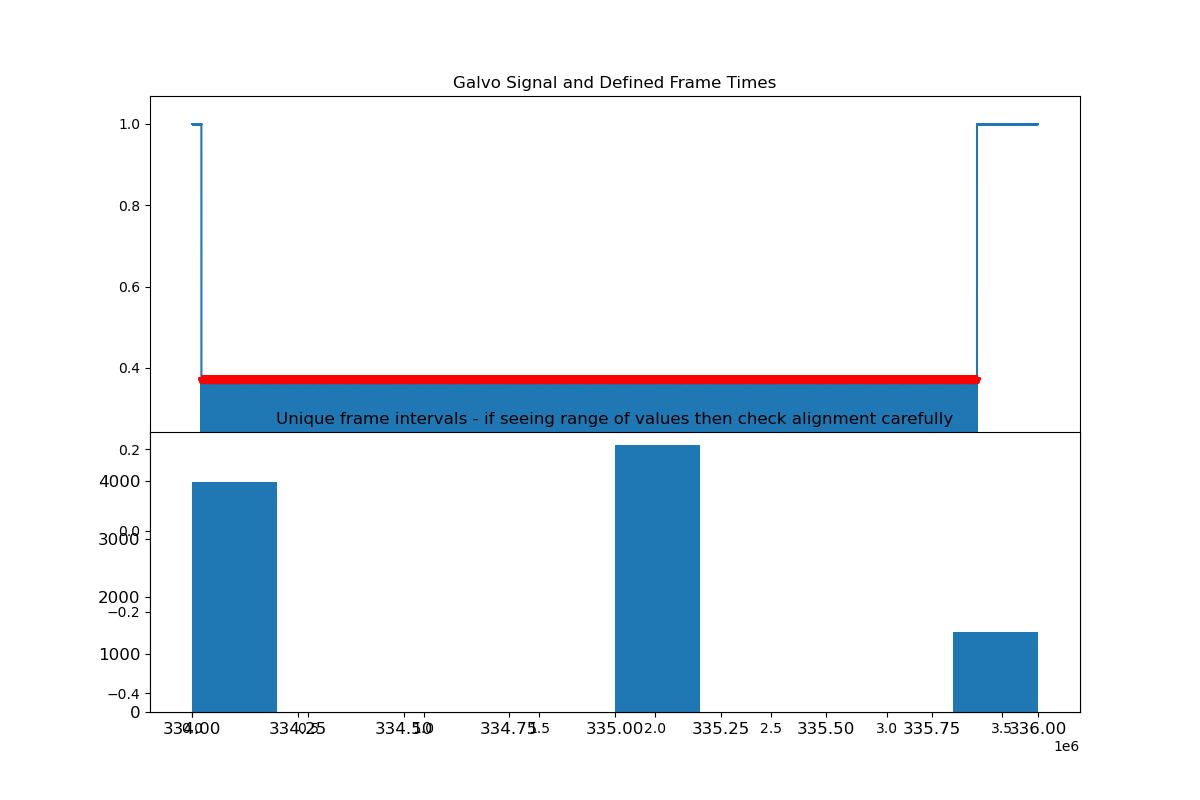

In [7]:
# Plot specific acquisitons in interactive plots to check the frame timings
idx = 2
acq = analyzer.alignment_info[idx]
analyzer.plot_frame_times(num=idx, galvo_signal=acq['galvo_signal_norm'],  frame_times=acq['frame_times'],plot_on=True)
#alignment_info[0]

#### Get Spiral Locations and Timing

In [ ]:
#### Get Spiral Locations and Timing
acquisition_data = analyzer.get_spiral_locations(min_height=0.1)

for acq_data in acquisition_data:
    analyzer.plot_spiral_detection(acq_data, save_dir=analyzer.save_folder, show_plot=False)



Parsing TSeries-09262024-920nm-1.75x-275poc-883.xml
Top level keys: ['versionAttribute', 'dateAttribute', 'notesAttribute', 'SystemIDs', 'PVStateShard', 'Sequence']

Parsing TSeries-09262024-920nm-1.75x-275poc-883_Cycle00001_MarkPoints.xml
Top level keys: ['IterationsAttribute', 'IterationDelayAttribute', 'CalcFunctMapAttribute', 'PVMarkPointElement']

Parsing TSeries-09262024-920nm-1.75x-275poc-884.xml
Top level keys: ['versionAttribute', 'dateAttribute', 'notesAttribute', 'SystemIDs', 'PVStateShard', 'Sequence']

Parsing TSeries-09262024-920nm-1.75x-275poc-884_Cycle00001_MarkPoints.xml
Top level keys: ['IterationsAttribute', 'IterationDelayAttribute', 'CalcFunctMapAttribute', 'PVMarkPointElement']

Parsing TSeries-09262024-920nm-1.75x-275poc-885.xml
Top level keys: ['versionAttribute', 'dateAttribute', 'notesAttribute', 'SystemIDs', 'PVStateShard', 'Sequence']

Parsing TSeries-09262024-920nm-1.75x-275poc-885_Cycle00001_MarkPoints.xml
Top level keys: ['IterationsAttribute', 'Iteratio

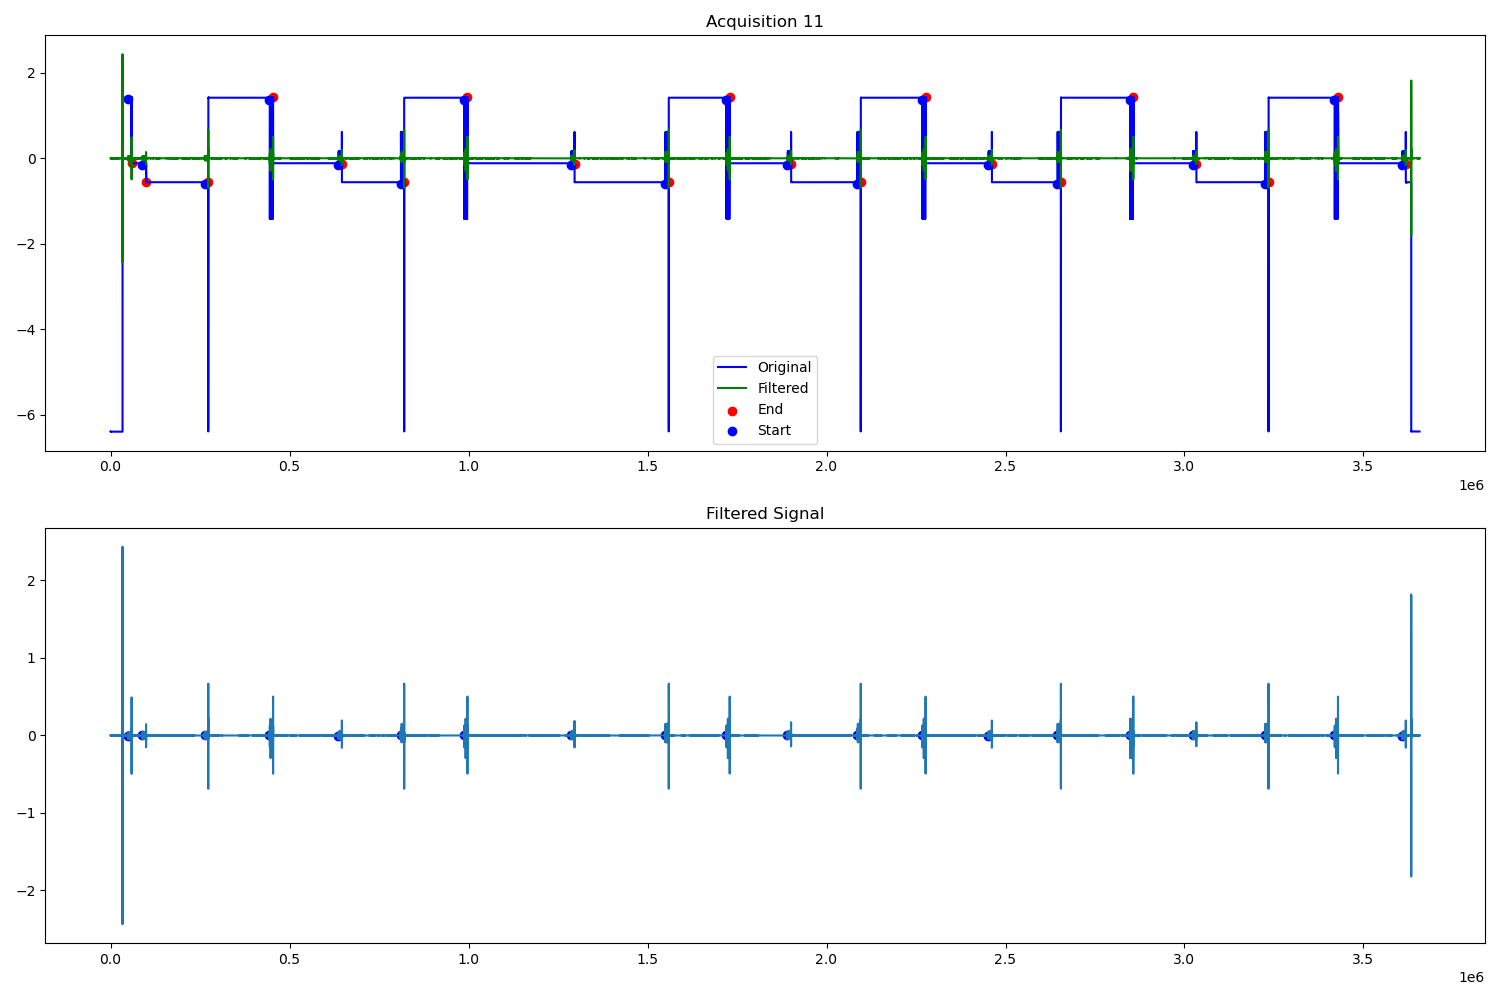

No such comm: fd7abd07ea1a4ae7a7fa53edc12239a2


In [11]:
# Look at individual acquisitions to inspect the accuracy of the spiral detections
analyzer.plot_spiral_detection(acquisition_data[11])

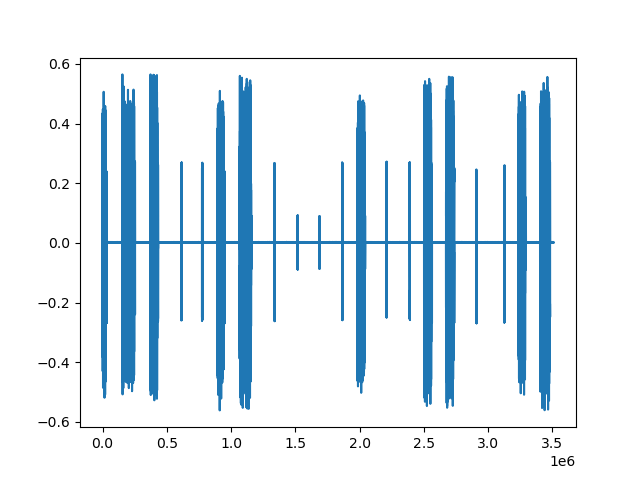

In [80]:
sync_files = sorted(glob.glob(os.path.join(analyzer.sync_base_path, '*.abf')))

sync_data = analyzer._load_sync_data(sync_files[0])

galvo = sync_data[:, 3]  # Adjust indices as needed

plt.figure()
plt.plot(galvo)


#### Process Targets and Trials
- create the structure with frames within each stimulation trial

In [37]:
# Set trial window parameters
pre_trial_window = 100
post_trial_window = 150

# Process targets and trials
analyzer.process_targets_and_trials(
    pre_trial_window=pre_trial_window,
    post_trial_window=post_trial_window
)

#### Create ROI Activity Plots
- create plots of fluorescence traces for each ROI and each target
- save the plots in the save folder

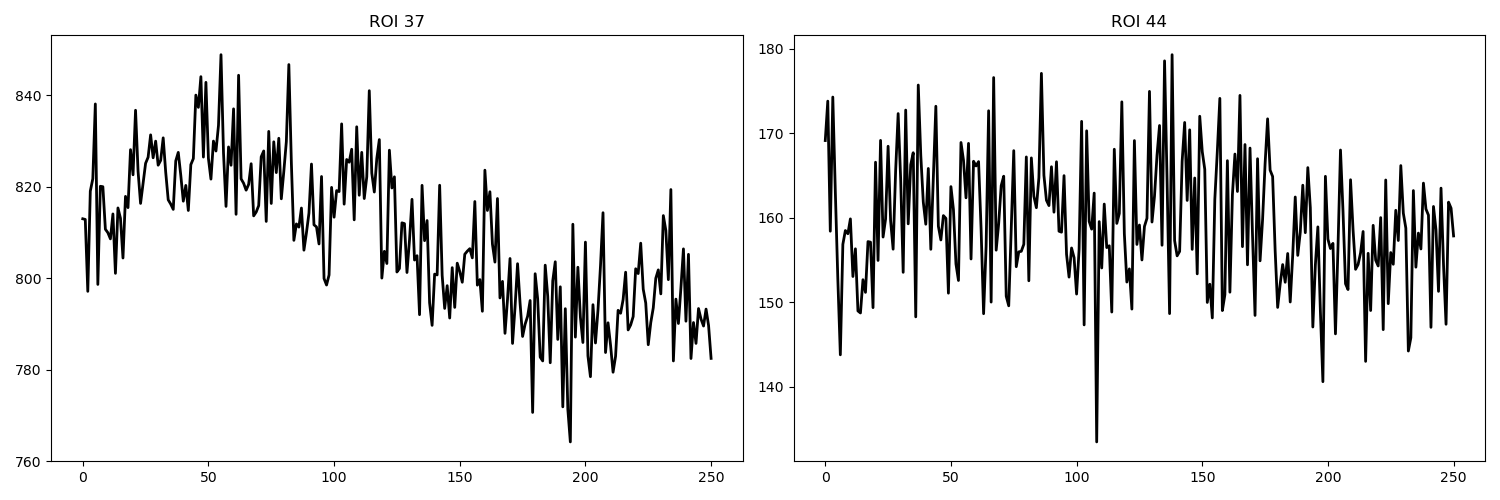

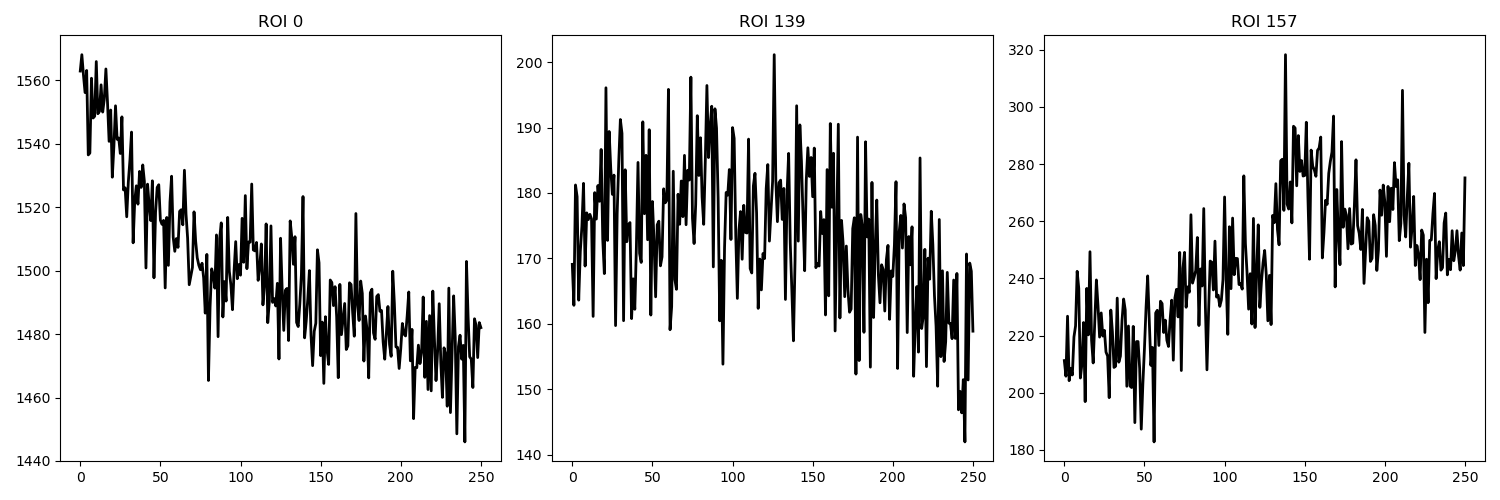

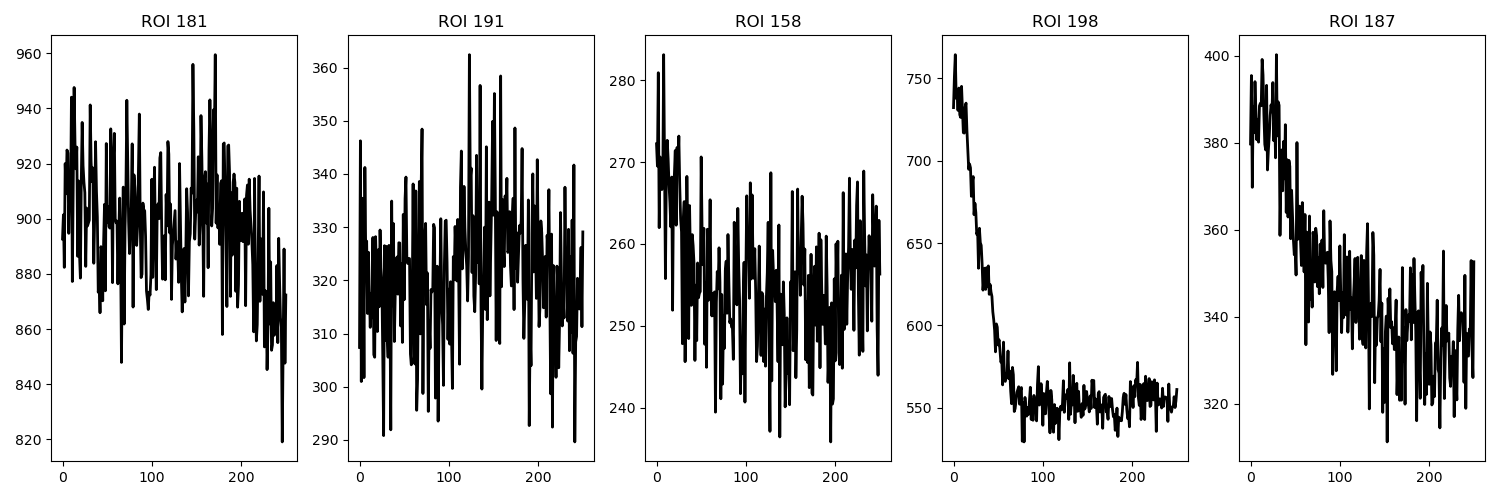

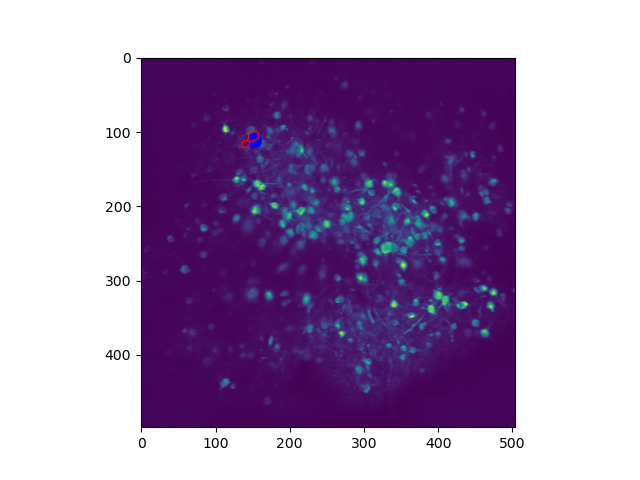

In [64]:
# Create save directory for ROI plots 
F_struct, F_struct2, Fneu_struct, roi_inds =  analyzer.create_ROI_traces()

analyzer.plot_ROI_traces(F_struct=F_struct, F_struct2=F_struct2,Fneu_struct=Fneu_struct,roi_inds=roi_inds)

In [67]:
# Print full structure
for target_id in F_struct2:
    print(f"\nTarget {target_id}:")
    print(f"Number of ROIs: {len(F_struct2[target_id])}")
    for roi_idx in F_struct2[target_id]:
        print(f"\tROI {roi_idx}:")
        print(f"\tNumber of trials: {len(F_struct2[target_id][roi_idx])}")
        print(f"\tShape of first trial: {np.shape(F_struct2[target_id][roi_idx][0])}")
        print(f"\tShape of all trials: {[np.shape(trial) for trial in F_struct2[target_id][roi_idx]]}")

# Or more concisely:
print("\nShape summary:")
for target_id in F_struct2:
    for roi_idx in F_struct2[target_id]:
        print(f"Target {target_id}, ROI {roi_idx}: {np.shape(F_struct2[target_id][roi_idx])}")


Target 0:
Number of ROIs: 2
	ROI 37:
	Number of trials: 95
	Shape of first trial: (61,)
	Shape of all trials: [(61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,)]
	ROI 44:
	Number of trials: 95
	Shape of first trial: (61,)
	Shape of all trials: [(61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), (61,), 

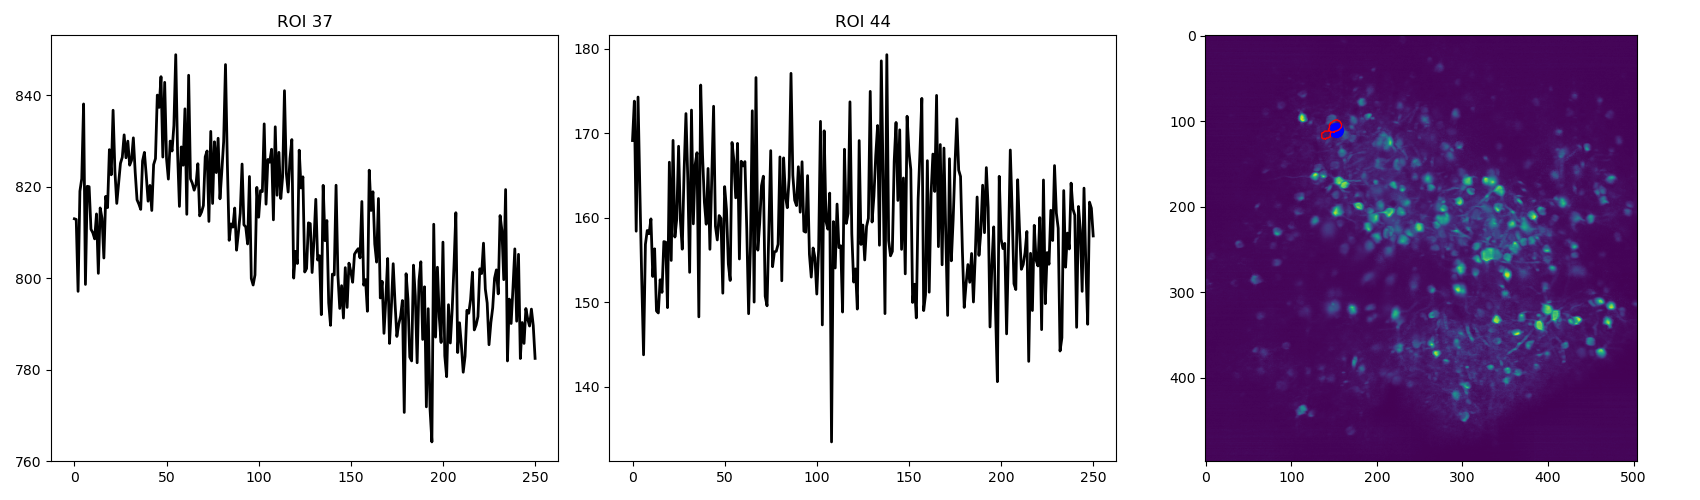

In [62]:
local_plot_ROI_traces(analyzer, F_struct, F_struct2, Fneu_struct, roi_inds)

In [63]:
def local_plot_ROI_traces(self, F_struct, F_struct2, Fneu_struct, roi_inds):
    for i in range(len(self.alignment_info[-1]['points'])):
        plt.figure(figsize=(17, 5))
        
        # Get ROIs for this target
        target_rois = self.trial_info['target_id'][i]
        dist_ids = np.array(self.trial_info['dist_id'][i])
        order = np.argsort(dist_ids)
        
        for n, roi_idx in enumerate(target_rois[order]):
            plt.subplot(1, len(target_rois)+1, n+1)
            
            # Plot all trials and mean if we have data for this ROI
            if roi_idx in F_struct2[i]:
                # Get list of traces
                traces_list = F_struct2[i][roi_idx]
                
                # Ensure all traces have the same length
                min_length = min(len(trace) for trace in traces_list)
                traces_array = np.array([trace[:min_length] for trace in traces_list])
                
                # Calculate the mean across trials
                mean_trace = np.mean(traces_array, axis=0)
                
                # Plot each trial
                # for trace in traces_array:
                #     plt.plot(trace.T, 'gray', alpha=0.3)  # Simply add .T here
                
                # Plot the mean trace
                plt.plot(mean_trace, 'k', linewidth=2)
                plt.title(f"ROI {roi_idx}")
        
        plt.subplot(1,len(target_rois)+1, len(target_rois[order])+1)
        ops = self.ops
        stat = self.stat 
        img = (ops['max_proj'] - ops['max_proj'].min()) / (ops['max_proj'].max() - ops['max_proj'].min())
        plt.scatter(self.alignment_info[-1]['points'][i, 0], self.alignment_info[-1]['points'][i, 1], s=100, c='b', marker='o')
        plt.imshow(img)
        plt.title('ROI Locations')
        for ii in range(len(self.trial_info['target_id'][i])):
            try:
                self._plot_mask_boundaries(self.trial_info['target_id'][i][ii], stat, color='r')
            except:
                continue

        roi_plot_dir = os.path.join(self.save_folder, 'roi plots')
        plt.tight_layout()
        plt.savefig(os.path.join(roi_plot_dir, f'{i+1} candidate rois neu correct'))
        plt.show()

## Analysis Complete
Check the save folder for results and generated plots.

In [14]:
# Save data for MATLAB
import scipy.io as sio

# Create dictionary with all the relevant data
matlab_data = {
    'F_struct': F_struct,
    'F_struct2': F_struct2,
    'Fneu_struct': Fneu_struct,
    'roi_inds': roi_inds,
    'trial_info': analyzer.trial_info,
    'alignment_info': analyzer.alignment_info,
    'F': analyzer.F,
    'Fneu': analyzer.Fneu,
    'spks': analyzer.spks
}

# Save to .mat file
save_path = os.path.join(analyzer.save_folder, 'analyzer_data.mat')
sio.savemat(save_path, matlab_data)
print(f"Data saved to: {save_path}")

Data saved to: W:\Jordyn\Processed Data\IG-6-1L\2024-10-01\python_proc\analyzer_data.mat


In [ ]:
import pickle
from calculate_influence import CalculateInfluence
inf = CalculateInfluence()
#importlib.reload(CalculateInfluence)

base = r'W:\Jordyn\Processed Data\IG-6-1L\2024-10-01\python_proc'
act = os.path.join(base, 'processed_activity_py.pkl')

with open (act, "rb") as file: 
    activity = pickle.load(file)

deconv = activity['deconv']
dff = activity['dff']

offset_data = np.load(os.path.join(base,'offsetInfo.npz')) 

In [7]:
trial_frames = analyzer.trial_info['trial_frames']
#inf.calculate_max_motion(dff,trial_frames,offset_data['distoff_um'])

dff.shape
np.shape(offset_data['distoff_um'])


NameError: name 'analyzer' is not defined